## Biological Signals Analysis - Week 4 Exercise

####  Jan. 31, 2024

#### Table of Contents:
- Images as Arrays
  - Python Example: Loading an Array Representation of a Microscopy Image
- Color vs Grayscale Images
- Thresholding
  - Python Example: Thresholding with a Microscopy Image
- Convolutions in Mathematics vs Image Processing
  - Python Example: Smoothing a Microscopy Image by Convolving With a Gaussian Filter
- Why Would We Want to Smooth an Image? - Edge Detection
  - Python Example: Smoothing a Noisy Sigmoid Curve
- Edge Detection: Sobel Kernel
  - Python Example: Detecting Edges in a Microscopy Image With the Sobel Operator
- Canny Edge Detection Algorithm
  - Python Example: Detecting Canny Edges in a Microscopy Image With the Edge Detector
- Hough Transforms for Shape Detection
  - Python Example: Detecting Circles in a Microscopy Image With the Hough Transforms
- Bonus Material: Deep Learning for Image Classification

## Images as Arrays <a id="ims-as-arrays" ></a>

A digital image, in its simplest form, is a matrix of pixel values. Each pixel represents the smallest unit of an image, holding a value that corresponds to its intensity or color. In grayscale images, each pixel is usually represented by a single value, indicating various shades of gray. Color images typically use a combination of red, green, and blue (RGB) values for each pixel.

Many Python libraries, such as `skimage` (Scikit-Image), provide an easy way to handle and process these images. Let's take a microscopy image as an example:

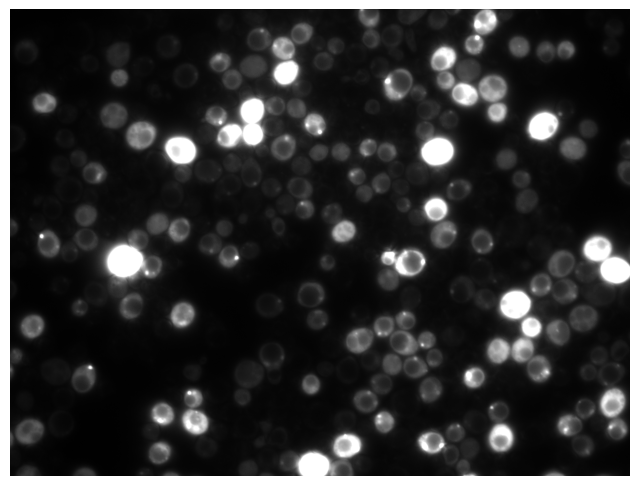

Array Representation of the Image:
[[219 225 220 ... 256 258 272]
 [218 211 217 ... 270 268 278]
 [217 217 214 ... 263 268 262]
 ...
 [337 343 321 ... 266 287 285]
 [320 323 339 ... 268 295 281]
 [329 353 335 ... 276 281 291]]

Shape of the Image Array: (1024, 1360)


In [19]:
import skimage.io
import matplotlib.pyplot as plt

# Load the image
image_url = 'https://cildata.crbs.ucsd.edu/media/images/13901/13901.tif'
image = skimage.io.imread(image_url)

# Visualizing the image
plt.figure(figsize=(8, 8))
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

# Displaying the array structure of the image
print("Array Representation of the Image:")
print(image)
print("\nShape of the Image Array:", image.shape)


We can see that the image we see as an image is simply an array of values. For grayscale images these values will be between 0 and 255. For RGB images, there will be three dimensions of the array, each containing pixel values between 0 and 255.
With this understanding of images, we can readily see that many of the operations we have already discussed in this course can be easily applied to images, with the goal of transforming them, filtering them, or augmenting them. Through such operations, we can extract useful information from our image data.

## Color vs Grayscale Images

Images are often represented as two primary types: color and grayscale. To comprehend these representations in the context of images as arrays, we can break down the key differences and their significance.

**Color Images:**
- **Representation**: In color images, each pixel is represented as a combination of three primary colors: Red, Green, and Blue (RGB). Each color channel (R, G, B) is usually an 8-bit value ranging from 0 to 255, representing the intensity of that color.
- **Array Structure**: Color images are represented as three separate 2D arrays, one for each color channel. These arrays are typically stacked together to form a 3D array.
- **Data Shape**: A color image with dimensions (height, width) is represented as (height, width, 3), where the last dimension corresponds to the three color channels (R, G, B).

**Grayscale Images:**
- **Representation**: Grayscale images, on the other hand, contain only shades of gray, with pixel values ranging from 0 (black) to 255 (white). There is only one color channel in grayscale images.
- **Array Structure**: Grayscale images are represented as a single 2D array, where each pixel's value directly represents its intensity or brightness.
- **Data Shape**: A grayscale image with dimensions (height, width) is represented as (height, width), containing pixel values that represent the gray levels.

**Significance in Image Processing:**
- **Color Images**: Color images capture rich visual information with detailed color variations. They are suitable for tasks like object recognition, where color is an important distinguishing factor.
- **Grayscale Images**: Grayscale images simplify the representation to intensity values, making them valuable for tasks where color information is less critical, such as edge detection, image thresholding, or processing in environments with limited resources.


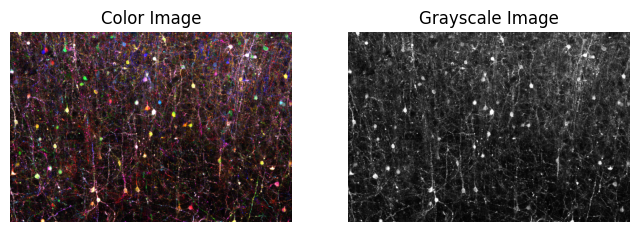

In [20]:
from PIL import Image
import matplotlib.pyplot as plt

image_path = '2017brainbow844.jpg'

# Load the image using PIL (Python Imaging Library)
img = Image.open(image_path)

# Display the original color image
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Color Image')
plt.axis('off')

# Convert the color image to grayscale
grayscale_img = img.convert('L')

# Display the grayscale version of the image
plt.subplot(1, 2, 2)
plt.imshow(grayscale_img, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.show()


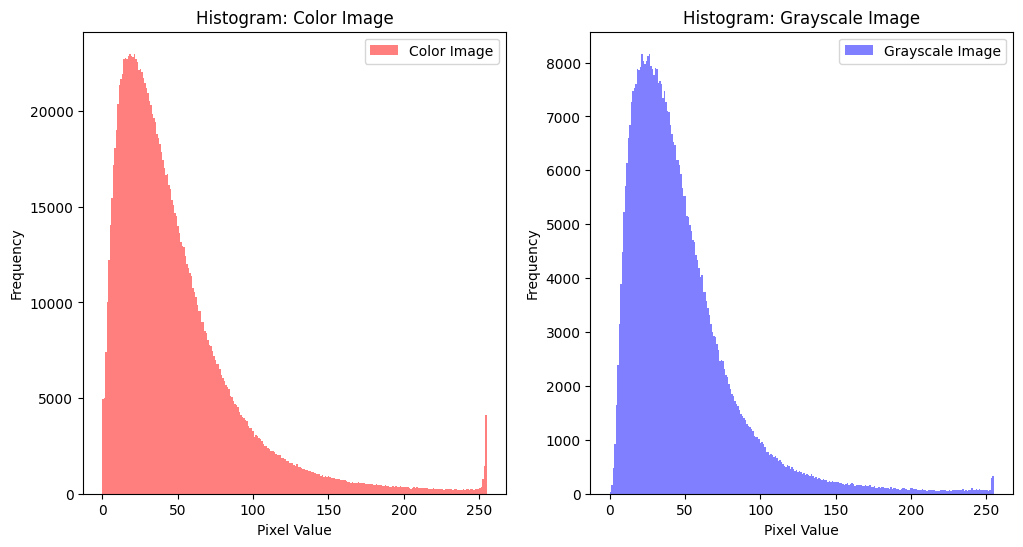

In [21]:
import matplotlib.pyplot as plt

image_path = '2017brainbow844.jpg'
img = Image.open(image_path)

# Convert the color image to grayscale
grayscale_img = img.convert('L')

# Convert the images to NumPy arrays
color_array = np.array(img)
grayscale_array = np.array(grayscale_img)

# Create subplots for histograms
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram for color image
axs[0].hist(color_array.ravel(), bins=256, color='r', alpha=0.5, label='Color Image')
axs[0].set_title('Histogram: Color Image')
axs[0].set_xlabel('Pixel Value')
axs[0].set_ylabel('Frequency')
axs[0].legend()

# Plot histogram for grayscale image
axs[1].hist(grayscale_array.ravel(), bins=256, color='b', alpha=0.5, label='Grayscale Image')
axs[1].set_title('Histogram: Grayscale Image')
axs[1].set_xlabel('Pixel Value')
axs[1].set_ylabel('Frequency')
axs[1].legend()

plt.show()


### Question for class: why are there so many fewer values in the histogram of the grayscale image?

## Thresholding

Thresholding is a simple yet effective technique used in image processing to separate objects from the background. This technique is particularly useful in the field of microscopy image analysis, where distinguishing features of interest from the background is a common task.

- **Binary Classification**: Thresholding classifies the pixel values in an image into two groups (foreground and background) based on a threshold value.
- **Threshold Value**: A pixel value is compared against this threshold. If the pixel value is higher than the threshold, it is assigned one value (often white), otherwise, it is assigned another value (often black).


In microscopy images, thresholding can help in identifying and segmenting specific cells or structures. It is a key step in preprocessing before performing more complex analyses, like object detection or image segmentation.

### Types of Thresholding

1. **Simple Thresholding**: Here, a global value is chosen manually. Pixels above this value are set to the maximum value, and others to the minimum.
2. **Adaptive Thresholding**: This method calculates the threshold for smaller regions, allowing for varying lighting conditions across different areas of the image.
3. **Otsu's Thresholding**: An automatic thresholding technique that chooses the optimal threshold value from the image histogram.

## Python Example: Thresholding

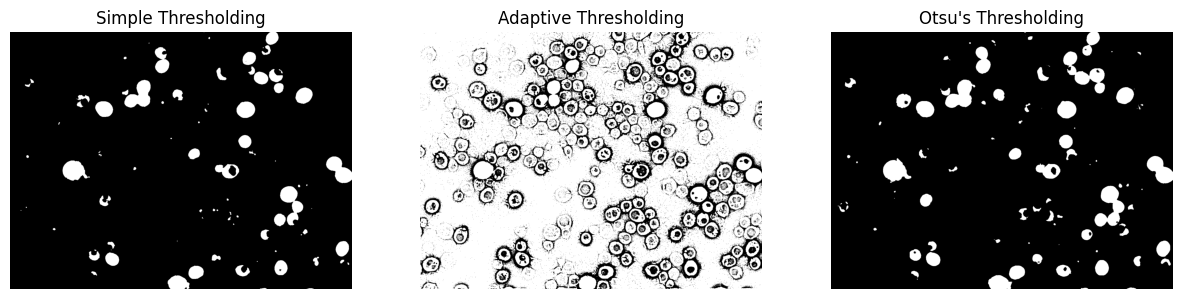

In [22]:
import cv2
import matplotlib.pyplot as plt
import skimage.io
import numpy as np

# Load the microscopy image
image_url = 'https://cildata.crbs.ucsd.edu/media/images/13901/13901.tif'
image = skimage.io.imread(image_url)

# Check if the image is already in grayscale
if len(image.shape) > 2 and image.shape[2] == 3:
    # Convert to grayscale if it is a color image
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
else:
    # Use the image as is if it is already in grayscale
    gray_image = image

# Convert to 8-bit (if not already)
if gray_image.dtype != np.uint8:
    gray_image = cv2.normalize(gray_image, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

# Simple Thresholding
_, simple_thresh = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)

# Adaptive Thresholding
adaptive_thresh = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                                        cv2.THRESH_BINARY, 11, 2)

# Otsu's Thresholding
_, otsu_thresh = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(simple_thresh, cmap='gray')
plt.title('Simple Thresholding')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(adaptive_thresh, cmap='gray')
plt.title('Adaptive Thresholding')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(otsu_thresh, cmap='gray')
plt.title("Otsu's Thresholding")
plt.axis('off')

plt.show()


## Convolution in Mathematics vs Image Processing <a id="convolutions-on-images" ></a>

### Mathematical Convolution

As we discussed last week, in mathematics, convolution is an operation that combines two functions into a third function. It represents the amount of overlap of one function as it is shifted over another.

For two continuous functions $ f $ and $ g $, convolution is defined as:

$ (f * g)(t) = \int_{-\infty}^{\infty} f(\tau)g(t - \tau) d\tau $

In the discrete case, typically used in digital signal processing, the formula becomes:

$ (f * g)[n] = \sum_{m=-\infty}^{\infty} f[m]g[n - m] $

Mathematical convolution is commutative, associative, and distributive over addition. This means the order of the functions does not change the result, allowing for flexible application in various contexts.

### Convolution in Image Processing

In image processing, convolution is a critical technique used for applying filters to images, such as for blurring, sharpening, or edge detection.
Convolution in image processing involves sliding a kernel (or filter) over the image, and performing pixel-wise multiplication and summing the results. Unlike mathematical convolution, the kernel is typically not reversed.

The adapted convolution formula for image processing is:

$ C(i, j) = \sum_{u=-k}^{k} \sum_{v=-k}^{k} I(i+u, j+v) \cdot K(u, v) $

Here, $ I $ represents the image, $ K $ is the kernel, and $ C $ is the convolved image.

### Key Differences

- **Kernel Flipping**: Unlike mathematical convolution, the kernel in image processing is not flipped before application.
- **Boundary Handling**: Image processing convolution must address boundary conditions, often through strategies like padding.
- **Purpose and Application**: While mathematical convolution is more abstract, convolution in image processing is applied for practical image manipulations, such as filtering and feature extraction.

### Example: Convolving Images With a Gaussian Filter <a id="convolved-filters" ></a>

### Gaussian Filter
A Gaussian filter is a widely used filter in image processing, known for its properties in reducing image noise and smoothing details.
The Gaussian filter is based on the Gaussian (normal) distribution. In a 2D Gaussian filter, the kernel values are calculated using the Gaussian function:

$ G(x, y) = \frac{1}{2 \pi \sigma^2} e^{- \frac{x^2 + y^2}{2 \sigma^2}} $

where `x` and `y` are distances from the origin in the horizontal and vertical axes, and `σ` is the standard deviation of the Gaussian distribution. The values of the Gaussian filter add up to 1, ensuring that the overall brightness of the image remains constant after filtering.

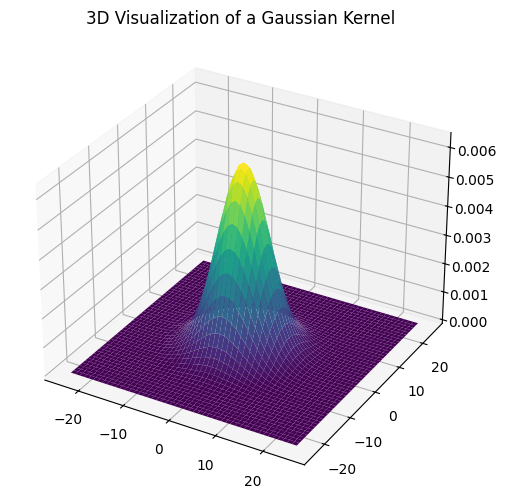

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def gaussian_kernel(size, sigma=1.0):
    x, y = np.mgrid[-size//2 + 1:size//2 + 1, -size//2 + 1:size//2 + 1]
    g = np.exp(-((x**2 + y**2) / (2.0 * sigma**2)))
    return g / g.sum()

size = 50  # Size of the kernel
sigma = 5  # Standard deviation of the Gaussian
kernel = gaussian_kernel(size, sigma)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

X, Y = np.mgrid[-size//2 + 1:size//2 + 1, -size//2 + 1:size//2 + 1]
Z = gaussian_kernel(size, sigma)

surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
ax.set_title('3D Visualization of a Gaussian Kernel')
plt.show()

Convolution with a Gaussian smoothens an image by reducing its noise and details, which is essential in various applications, from enhancing image quality to preparing images for further analysis, like feature extraction. The Gaussian filter's effectiveness in image processing stems from its smooth bell-shaped curve, which provides natural weight distribution.

The convolution of an image $ I $ with a Gaussian filter $ G $ is mathematically represented as:

$ (I * G)(i, j) = \sum_{u=-k}^{k} \sum_{v=-k}^{k} I(i+u, j+v) \cdot G(u, v) $

In this formula:
- $ (I * G)(i, j) $ denotes the value of the convolved image at position $ (i, j) $.
- The sums iterate over the kernel's dimensions, with $ u $ and $ v $ spanning the width and height of the kernel, centered at $ (i, j) $.
- $ I(i+u, j+v) $ is the original image's pixel value at position $ (i+u, j+v) $.
- $ G(u, v) $ refers to the Gaussian filter's value at position $ (u, v) $.

Through this operation, each pixel in the image is averaged with its neighbors, weighted according to the Gaussian filter. This results in a blurred version of the original image, with the extent of blurring being controlled by the standard deviation $ \sigma $ of the Gaussian filter. A higher $ \sigma $ means more blurring, as the filter has a broader curve and therefore encompasses more neighboring pixels in its calculations. Thus, convolution with a Gaussian filter reduces high-frequency components (like noise and edges).


We'll apply a Gaussian filter to a microscopy image to observe this smoothing effect:


In [36]:
import skimage.io
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from ipywidgets import interact, FloatSlider

image_url = 'https://cildata.crbs.ucsd.edu/media/images/13901/13901.tif'
image = skimage.io.imread(image_url)

def update_plot(sigma):
    filtered_image = gaussian_filter(image, sigma=sigma)
    fig, ax = plt.subplots(1, 2, figsize=(16, 8))
    ax[0].imshow(image, cmap='gray')
    ax[0].set_title('Original Image')
    ax[0].axis('off')
    ax[1].imshow(filtered_image, cmap='gray')
    ax[1].set_title(f'Filtered Image with Gaussian Filter (sigma={sigma})')
    ax[1].axis('off')
    plt.show()

sigma_slider = FloatSlider(
    value=2.0,
    min=0.0,
    max=50.0,
    step=0.1,
    description='Sigma:',
    continuous_update=False
)
interact(update_plot, sigma=sigma_slider)

interactive(children=(FloatSlider(value=2.0, continuous_update=False, description='Sigma:', max=50.0), Output(…

<function __main__.update_plot(sigma)>

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact
import skimage.io
from scipy.ndimage import gaussian_filter

# Load the image
image_url = "https://cildata.crbs.ucsd.edu/media/images/13901/13901.tif"
image = skimage.io.imread(image_url)

# Define the interactive plotting function
def update(sigma):
    # Apply Gaussian filter
    filtered_image = gaussian_filter(image, sigma=sigma)
    
    # Plot the histograms
    plt.figure(figsize=(10, 6))
    plt.hist(image.ravel(), bins=256, color='blue', alpha=0.5, label='Original Image')
    plt.hist(filtered_image.ravel(), bins=256, color='red', alpha=0.5, label='Filtered Image')
    plt.title('Histogram of Pixel Intensities')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# Use the interact function to create a slider
interact(update, sigma=(0.0, 100.0, 1.0))


interactive(children=(FloatSlider(value=50.0, description='sigma', step=1.0), Output()), _dom_classes=('widget…

<function __main__.update(sigma)>

## Why Would We Want to Smooth Out an Image? - Edge Detection <a id="smoothing-for-edge" ></a>

Edge detection is a critical operation in image processing and computer vision, essential for feature extraction and object segmentation. At its core, edge detection is about detecting sharp changes in pixel intensity, which typically signify boundaries or transitions in an image.

Mathematically, edges correspond to regions of high intensity change. This change can be identified using the concept of derivatives, similar to how we find the rate of change in calculus. In the context of digital images, we use the partial derivative to measure the change in intensity along the horizontal and vertical axes.

For a two-dimensional image $ I(x, y) $, the gradient $ \nabla I $ is a vector of the partial derivatives in the x and y directions:

$ \nabla I(x, y) = \left( \frac{\partial I}{\partial x}, \frac{\partial I}{\partial y} \right) $

The magnitude of this gradient vector gives the rate of change of intensity at each point in the image:

$ \|\nabla I(x, y)\| = \sqrt{\left( \frac{\partial I}{\partial x} \right)^2 + \left( \frac{\partial I}{\partial y} \right)^2} $

High values of this magnitude indicate potential edges.

### Noise & Edge Detection

However, real-world images often contain noise – random variations in pixel intensity. Noise can significantly interfere with edge detection, as the derivatives amplify these variations, leading to false edges (see python example below)

### Role of Smoothing Filters

To mitigate the impact of noise, it is common practice to first smooth the image using a filter, such as the Gaussian filter we discussed, before applying edge detection. After smoothing, the partial derivatives are computed on the smoothed image $ I_{smoothed} $ instead of the original. This approach allows for a more accurate detection of true edges by minimizing the influence of noise.

The result can be demonstrated in the python-generated plots below, where a sigmoid function representing an edge in an image is smoothed, leading to an obvious edge detection when taking its partial derivative.

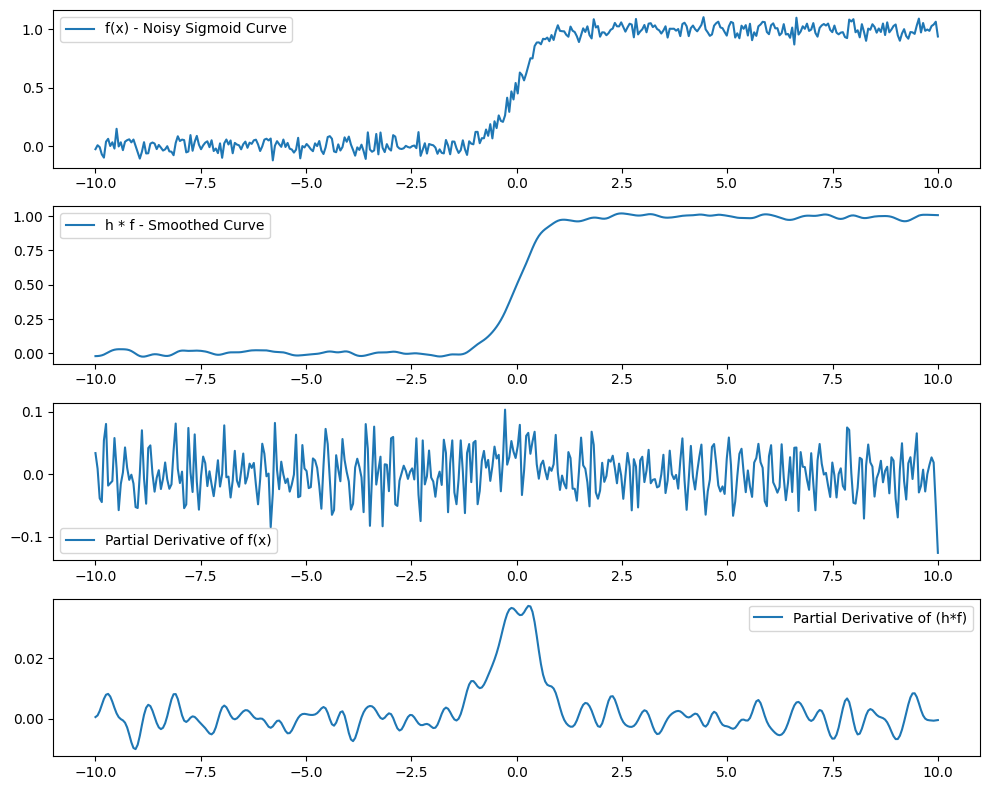

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# Creating a sharper sigmoid curve to represent a shift in pixel intensity values
x = np.linspace(-10, 10, 400)
sharp_sigmoid_curve = 1 / (1 + np.exp(-3*x))  # Steeper transition in the sigmoid
noise = np.random.normal(0, 0.05, sharp_sigmoid_curve.shape)
noisy_sigmoid_curve = sharp_sigmoid_curve + noise

# Gaussian filter for more intense smoothing (h)
sigma = 3  # Higher sigma for more intense smoothing
smoothed_curve = gaussian_filter(noisy_sigmoid_curve, sigma=sigma)

# Partial derivative of the smoothed and unsmoothed curves
derivative_smoothed = np.gradient(smoothed_curve)
derivative_unsmoothed = np.gradient(noisy_sigmoid_curve)

# Plotting
fig, axs = plt.subplots(4, 1, figsize=(10, 8))

axs[0].plot(x, noisy_sigmoid_curve, label="f(x) - Noisy Sigmoid Curve")
axs[0].legend()

axs[1].plot(x, smoothed_curve, label="h * f - Smoothed Curve")
axs[1].legend()

axs[2].plot(x, derivative_unsmoothed, label="Partial Derivative of f(x)")
axs[2].legend()

axs[3].plot(x, derivative_smoothed, label="Partial Derivative of (h*f)")
axs[3].legend()

plt.tight_layout()
plt.show()

## Sobel Kernel

The Sobel Kernel, or Sobel Operator, is a fundamental tool in image processing used primarily for edge detection. It is named after Irwin Sobel, who, along with Gary Feldman, introduced the concept in 1968. The Sobel Kernel is particularly effective in emphasizing edges and transitions in intensity in an image.

### Concept of the Sobel Kernel

The Sobel Kernel is a discrete differentiation operator. It computes an approximation of the gradient of the image intensity function. By applying the Sobel Kernel to an image, one can extract important information about the spatial variation of intensity, revealing the edges and structural features in the image.

### How the Sobel Kernel Works

The Sobel Kernel operates by convolving the kernel with the image, a process akin to a weighted averaging. There are two Sobel Kernels: one for detecting changes in horizontal gradients (Sobel X) and another for detecting changes in vertical gradients (Sobel Y).

#### Sobel X Kernel (Detects Horizontal Edges):

$ G_x = \begin{bmatrix} -1 & 0 & +1 \\ -2 & 0 & +2 \\ -1 & 0 & +1 \end{bmatrix} $

#### Sobel Y Kernel (Detects Vertical Edges):

$ G_y = \begin{bmatrix} -1 & -2 & -1 \\ 0 & 0 & 0 \\ +1 & +2 & +1 \end{bmatrix} $

- **Gx**: The horizontal edge kernel emphasizes horizontal edges by detecting changes in brightness along the x-axis.
- **Gy**: The vertical edge kernel emphasizes vertical edges by detecting changes in brightness along the y-axis.

### Application of the Sobel Operator

When the kernels are applied to an image, they produce two derivative estimates: one for horizontal changes (Gx) and one for vertical changes (Gy). These derivatives can be combined to find the overall gradient magnitude at each point in the image:

$ Gradient\;Magnitude = \sqrt{Gx^2 + Gy^2} $

The direction of the gradient can also be calculated, which indicates the direction of the sharpest intensity change:

$ Gradient\;Direction = \arctan2(Gy, Gx) $


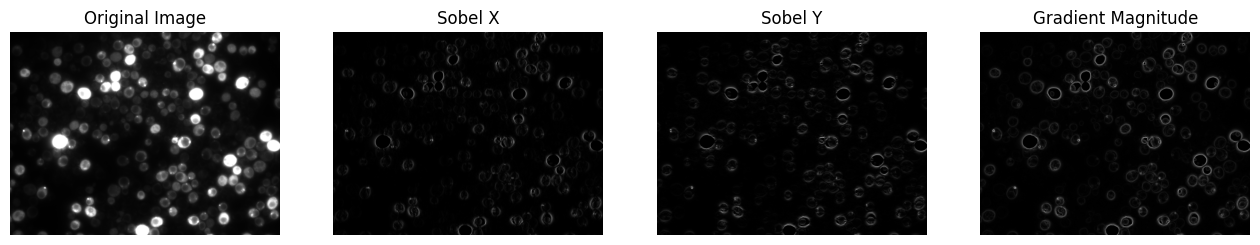

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage.io

# Load the microscopy image
image_url = 'https://cildata.crbs.ucsd.edu/media/images/13901/13901.tif'
image = skimage.io.imread(image_url)

# Check if the image is already in grayscale
if len(image.shape) > 2 and image.shape[2] == 3:
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
else:
    gray_image = image

# Apply Sobel kernels
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)

# Calculate the gradient magnitude
gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

# Display the results
fig, axs = plt.subplots(1, 4, figsize=(16, 4))

axs[0].imshow(gray_image, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(np.abs(sobel_x), cmap='gray')
axs[1].set_title('Sobel X')
axs[1].axis('off')

axs[2].imshow(np.abs(sobel_y), cmap='gray')
axs[2].set_title('Sobel Y')
axs[2].axis('off')

axs[3].imshow(gradient_magnitude, cmap='gray')
axs[3].set_title('Gradient Magnitude')
axs[3].axis('off')

plt.show()


## Canny Edge Detection Algorithm

The Canny Edge Detection algorithm, developed by John F. Canny in 1986, is a multi-stage process to detect a wide range of edges in images. It aims to satisfy three main criteria:
1. **Good Detection**: The algorithm should mark as many real edges in the image as possible.
2. **Good Localization**: Edges marked should be as close as possible to the edge in the real image.
3. **Minimal Response**: Each edge should only be marked once, and where possible, image noise should not create false edges.

### Stages of the Canny Edge Detection Algorithm

#### 1. Noise Reduction
Since edge detection is susceptible to noise in the image, the first step is to reduce the noise. This is typically done using a Gaussian filter. The filter smooths the image to reduce the impact of obvious noise on the edge detection.

#### 2. Finding the Intensity Gradient of the Image
The smoothed image is then filtered with a Sobel kernel in both horizontal and vertical directions to get the first derivative in the horizontal direction (Gx) and the vertical direction (Gy). From these, the edge gradient and direction can be determined:

$ Gradient\;Magnitude = \sqrt{Gx^2 + Gy^2} $

$ Angle = \arctan2(Gy, Gx) $

The gradient direction is rounded to one of four angles representing vertical, horizontal, and two diagonal directions.

#### 3. Non-maximum Suppression
To get rid of spurious response to edge detection, the edges should be thinned. In this step, pixels that are not part of the edge are suppressed. Pixel values are set to 0 if they are not the maximum among their neighbors in the direction of the edge gradient.

#### 4. Double Threshold
After applying non-maximum suppression, it's possible to have weak and strong edges. To distinguish between them, two thresholds are set: a high and a low threshold. Strong edges are defined as intensity gradients higher than the high threshold, and weak edges are those higher than the low threshold but smaller than the high threshold. Weak edges that are connected to strong edges are considered part of the edge, otherwise, they are suppressed.

#### 5. Edge Tracking by Hysteresis
The final step involves converting weak edges into strong ones if they are connected to strong edges. This process is known as hysteresis. It helps to ensure that weak edges resulting from true edges are kept while others are discarded.


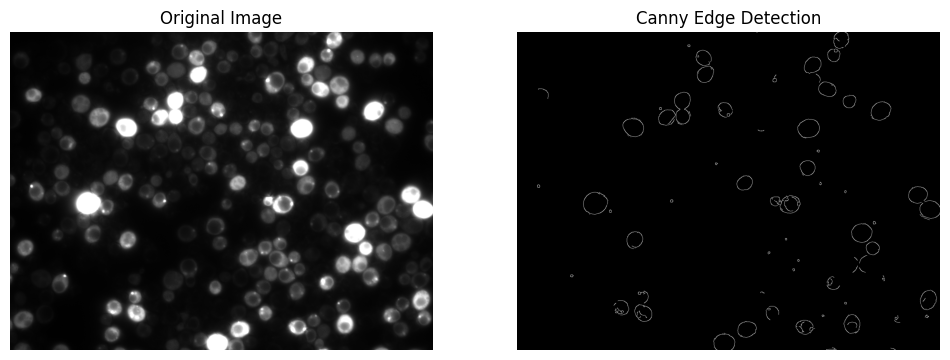

In [30]:
import cv2
import matplotlib.pyplot as plt
import skimage.io

# Load the microscopy image
image_url = 'https://cildata.crbs.ucsd.edu/media/images/13901/13901.tif'
image = skimage.io.imread(image_url)

# Convert to grayscale if the image is in color
if len(image.shape) > 2 and image.shape[2] == 3:
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
else:
    gray_image = image

# Convert to 8-bit (if not already)
if gray_image.dtype != np.uint8:
    # Scale to the range 0-255 if necessary
    gray_image = cv2.normalize(gray_image, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

# Apply Canny edge detection
edges = cv2.Canny(gray_image, 100, 200)  # Threshold values can be adjusted

# Display the results
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].imshow(gray_image, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(edges, cmap='gray')
axs[1].set_title('Canny Edge Detection')
axs[1].axis('off')

plt.show()


## Hough Transforms

Hough Transforms are a powerful technique for detecting simple shapes like lines, circles, and other parametric forms in images. This method is particularly useful in situations where these shapes are distorted or obscured. Hough Transforms convert the problem of detecting shapes in an image into a voting procedure within a mathematical space, known as the Hough space. This technique is beneficial when dealing with imperfect shape instances, which are often encountered in biological images due to noise or partial occlusion.

### The Shift from Image Space to Parameter Space

The fundamental concept of the Hough Transform involves a shift in perspective:

- **Image Space**: Where our image exists, and each pixel has coordinates like (x, y).
- **Parameter Space (Hough Space)**: A conceptual mathematical space where each point or shape in the image space is represented by its defining parameters.

The idea is to explore the relationships between these spaces to detect shapes.

### Hough Transforms for Line Detection

One of the simplest applications of the Hough Transform is detecting straight lines, which is often represented as a problem of identifying points that lie along the same line.

In mathematical terms, a line can be represented as $ y = mx + c $. However, this formulation is not suitable for vertical lines as the slope (m) becomes infinite. Therefore, we use a polar coordinate representation:

$ \rho = x \cos \theta + y \sin \theta $

Here, $ \rho $ is the perpendicular distance from the origin to the line, and $ \theta $ is the angle formed by the line perpendicular to the x-axis.

#### The Voting Process in Hough Space

In the Hough space, a single point in the image space maps to a sinusoidal curve representing all possible lines passing through it. When multiple curves intersect in the Hough space, it signifies that the corresponding points in the image space are aligned, indicating a line's presence.


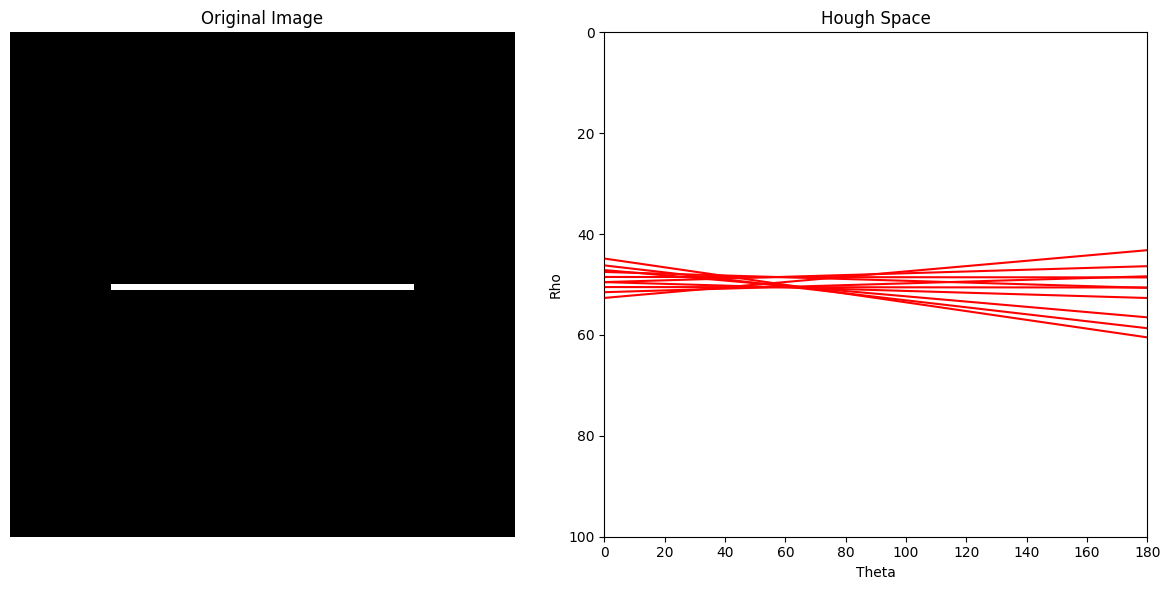

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Create a simple image with a line
image = np.zeros((100, 100), dtype=np.uint8)
image[50, 20:80] = 255  # Creating a horizontal line

# Apply Hough Transform
edges = cv2.Canny(image, 50, 150)
lines = cv2.HoughLines(edges, 1, np.pi/180, threshold=20)

# Visualize the original image and its Hough Transform
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Original Image
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

# Hough Space
if lines is not None:
    for rho, theta in lines[:, 0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        ax[1].plot((x1, x2), (y1, y2), 'red')
ax[1].set_xlim([0, 180])
ax[1].set_ylim([0, max(image.shape)])
ax[1].set_xlabel('Theta')
ax[1].set_ylabel('Rho')
ax[1].set_title('Hough Space')
ax[1].invert_yaxis()

plt.tight_layout()
plt.show()


### Explanation:

- **Image Creation**: A simple binary image with a horizontal line is created.
- **Edge Detection**: The Canny edge detector is applied to find edges in the image, which is a common preprocessing step before applying the Hough Transform.
- **Hough Transform**: `cv2.HoughLines` is used to apply the Hough Transform. It returns an array of `rho` and `theta` values representing the detected lines.
- **Visualization**:
   - The original image is displayed to show the line in the image space.
   - The Hough Space is visualized by plotting the lines represented by the detected `rho` and `theta` values. Each line in the Hough space corresponds to a curve for a point on the actual line in the image space. The intersection of these lines in Hough space represents the detected line in the image space.

This code provides a visual demonstration of how the Hough Transform can be used to detect lines in an image, and how the intersection of curves in Hough space corresponds to these lines.

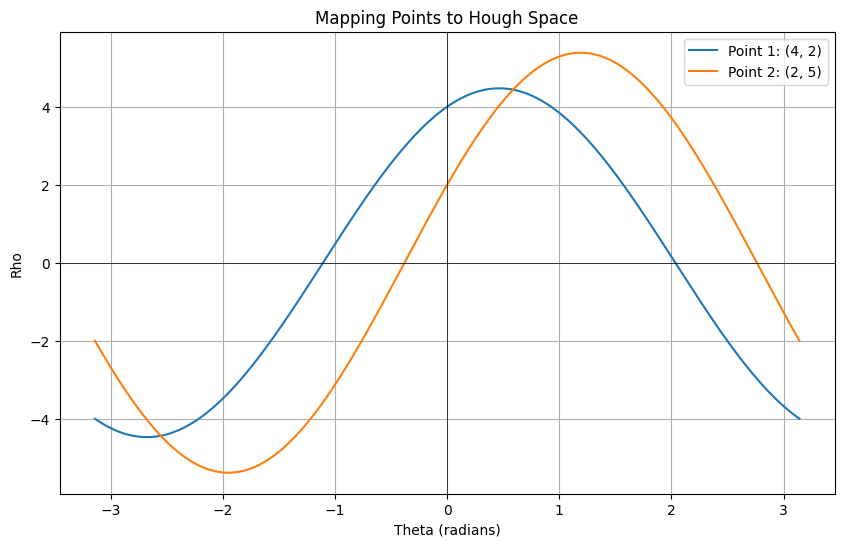

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Define two points in image space
point1 = (4, 2)  # (x1, y1)
point2 = (2, 5)  # (x2, y2)

# Generate theta values
theta = np.linspace(-np.pi, np.pi, 400)

# Hough Transform equations for the two points
rho1 = point1[0] * np.cos(theta) + point1[1] * np.sin(theta)
rho2 = point2[0] * np.cos(theta) + point2[1] * np.sin(theta)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(theta, rho1, label=f'Point 1: {point1}')
plt.plot(theta, rho2, label=f'Point 2: {point2}')
plt.xlabel('Theta (radians)')
plt.ylabel('Rho')
plt.title('Mapping Points to Hough Space')
plt.axhline(y=0, color='black',linewidth=0.5)
plt.axvline(x=0, color='black',linewidth=0.5)
plt.grid(True)
plt.legend()
plt.show()


### Hough Transforms for Circle Detection

For detecting circles, a similar principle is applied. A circle with radius $ r $ and center $(a, b)$ in the image space can be described by:

$ (x - a)^2 + (y - b)^2 = r^2 $

In Hough space, this translates to a more complex parameter space where intersections indicate the presence of a circle.

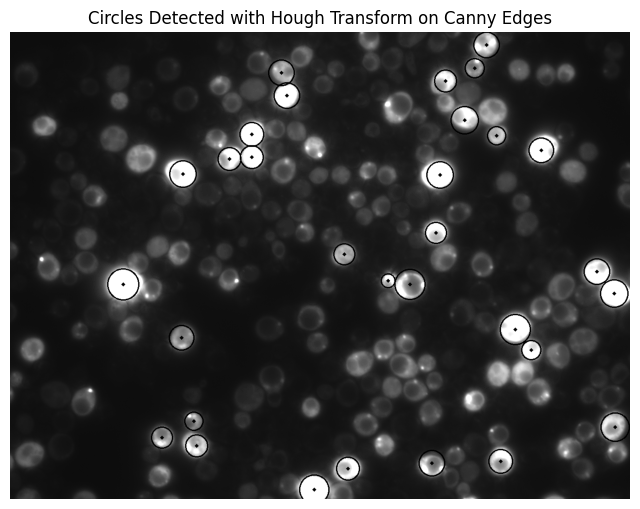

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage.io

# Load the microscopy image
image_url = 'https://cildata.crbs.ucsd.edu/media/images/13901/13901.tif'
original_image = skimage.io.imread(image_url)

image_for_drawing = original_image.copy()

if len(original_image.shape) > 2 and original_image.shape[2] == 3:
    gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
else:
    gray_image = original_image
if gray_image.dtype != np.uint8:
    gray_image = cv2.normalize(gray_image, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

# Apply Canny edge detection
edges = cv2.Canny(gray_image, 100, 200)

# Apply Hough Circle Transform on the edges with adjusted radius parameters
circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, dp=1.2, minDist=20, param1=50, param2=30, minRadius=0, maxRadius=100)

# Draw the detected circles on the copy of the original image
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])  # Circle center
        radius = i[2]  # Circle radius
        # Draw the circle outline in red
        cv2.circle(image_for_drawing, center, radius, (0, 0, 255), 2)
        # Draw the center of the circle in red
        cv2.circle(image_for_drawing, center, 2, (0, 0, 255), 3)

# Display the results
plt.figure(figsize=(8, 8))
plt.imshow(image_for_drawing, cmap='gray')
plt.title('Circles Detected with Hough Transform on Canny Edges')
plt.axis('off')
plt.show()


## Bonus Material: Deep Learning for Object Classification

Artificial Neural Networks (ANNs) are a foundational concept in the field of machine learning and artificial intelligence, inspired by the biological neural networks that constitute animal brains. The concept of ANNs is inspired by biological neurons in the brain. Each biological neuron receives inputs through its dendrites (analogous to the inputs in an ANN), processes the signals, and then transmits the output to other neurons via its axon and synapses.
An ANN is composed of layers of interconnected nodes or 'neurons,' each of which performs a simple computation. The basic structure includes an input layer, one or more hidden layers, and an output layer.

- **Neurons**: Each neuron receives input from either the data (in the case of the input layer) or the output of neurons from the previous layer. 
- **Connections**: Every connection between two neurons has a weight associated with it. These weights determine the importance of the input values.

The output of a neuron is a function of the weighted sum of its inputs, plus a bias term. This can be mathematically represented as:

$ y = f(\sum (w_i \cdot x_i) + b) $

Where:
- $ y $ is the output.
- $ w_i $ represents the weight of the ith connection.
- $ x_i $ is the ith input to the neuron.
- $ b $ is the bias term.
- $ f $ is an activation function that introduces non-linearity.

In the context of image classification:
- The **number of neurons in the output layer** corresponds to the **number of classes**. For instance, in a task to classify images as either cats or dogs, the output layer would consist of two neurons.
- Each neuron in the output layer represents a class, and the output value signifies the likelihood or probability of the input belonging to that class.

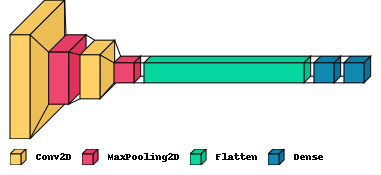

In [34]:
import visualkeras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Create a simple CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1), name='Conv2D_1'),
    MaxPooling2D(pool_size=(2, 2), name='MaxPooling2D_1'),
    Conv2D(64, kernel_size=(3, 3), activation='relu', name='Conv2D_2'),
    MaxPooling2D(pool_size=(2, 2), name='MaxPooling2D_2'),
    Flatten(name='Flatten'),
    Dense(128, activation='relu', name='Dense_1'),
    Dense(10, activation='softmax', name='Output')
])

# Visualize the model
visualkeras.layered_view(model, legend=True, to_file='cnn_visualization.png')  # Save as PNG


### Activation Functions
Functions applied to the output of a neural network layer, introducing non-linearity into the model.

- **Linear Limitation**: A neural network without activation functions would essentially be a linear regression model, capable only of understanding linear mappings between inputs and outputs. This is inadequate for complex tasks like image recognition or natural language processing.
- **Non-linear Mapping**: Activation functions provide the necessary non-linearity, allowing neural networks to learn and represent more complex relationships in data.

### Biological Analogy

- In biological neural networks, synapses can act like thresholding mechanisms, determining whether or not to activate a neuron in response to the received signals. Activation functions in artificial neural networks similarly decide how much signal to pass forward.


1. **Sigmoid Function**: Often used in binary classification, the sigmoid function maps input values to the range between 0 and 1, making it useful for probabilities. However, it's less popular now due to issues like vanishing gradients.

2. **ReLU (Rectified Linear Unit)**: This function outputs the input directly if positive; otherwise, it outputs zero. It's widely used because of its simplicity and efficiency, especially in deep neural networks.

3. **TanH (Hyperbolic Tangent)**: Similar to the sigmoid but maps values between -1 and 1. It's often used in hidden layers of neural networks.

4. **Leaky ReLU**: A variation of ReLU, it allows a small gradient when the unit is not active, overcoming some of the limitations of the original ReLU function.

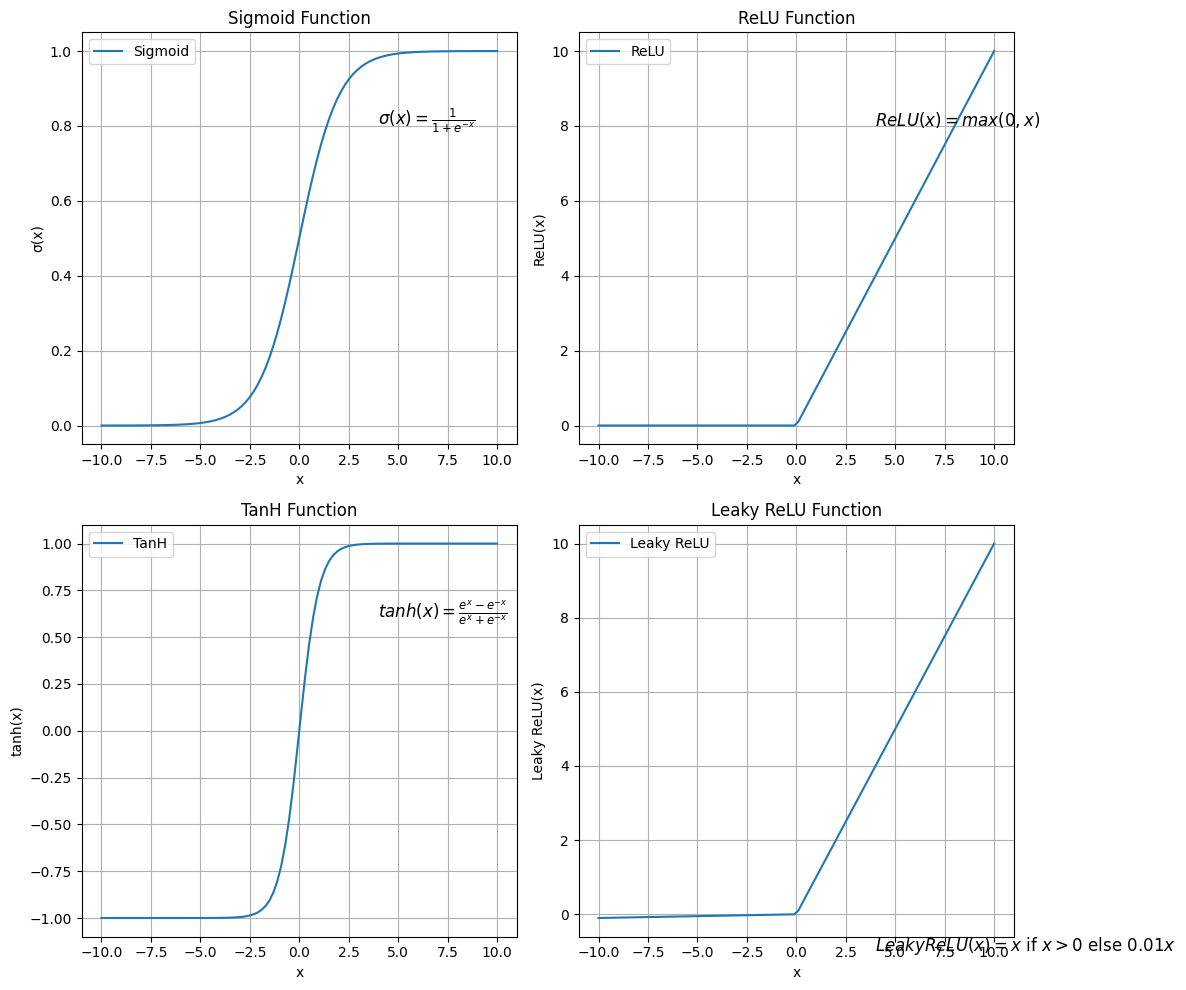

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, x * alpha)

# Generate a range of values
x = np.linspace(-10, 10, 100)

# Create plots
plt.figure(figsize=(12, 10))

# Sigmoid Function Plot
plt.subplot(2, 2, 1)
plt.plot(x, sigmoid(x), label="Sigmoid")
plt.title("Sigmoid Function")
plt.xlabel("x")
plt.ylabel("σ(x)")
plt.text(4, 0.8, r'$\sigma(x) = \frac{1}{1+e^{-x}}$', fontsize=12)
plt.grid(True)
plt.legend()

# ReLU Function Plot
plt.subplot(2, 2, 2)
plt.plot(x, relu(x), label="ReLU")
plt.title("ReLU Function")
plt.xlabel("x")
plt.ylabel("ReLU(x)")
plt.text(4, 8, r'$ReLU(x) = max(0, x)$', fontsize=12)
plt.grid(True)
plt.legend()

# TanH Function Plot
plt.subplot(2, 2, 3)
plt.plot(x, tanh(x), label="TanH")
plt.title("TanH Function")
plt.xlabel("x")
plt.ylabel("tanh(x)")
plt.text(4, 0.6, r'$tanh(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}$', fontsize=12)
plt.grid(True)
plt.legend()

# Leaky ReLU Function Plot
plt.subplot(2, 2, 4)
plt.plot(x, leaky_relu(x), label="Leaky ReLU")
plt.title("Leaky ReLU Function")
plt.xlabel("x")
plt.ylabel("Leaky ReLU(x)")
plt.text(4, -1, r'$LeakyReLU(x) = x \text{ if } x > 0 \text{ else } 0.01x$', fontsize=12)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()